<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#7Z1018,-Week-6:-Multivariate-Data-Distributions,-Relationships,-and-Plots" data-toc-modified-id="7Z1018,-Week-6:-Multivariate-Data-Distributions,-Relationships,-and-Plots-1">7Z1018, Week 6: Multivariate Data Distributions, Relationships, and Plots</a></span><ul class="toc-item"><li><span><a href="#The-Example-Datasets" data-toc-modified-id="The-Example-Datasets-1.1">The Example Datasets</a></span></li><li><span><a href="#Firstly,-Plotting-Grids-(via-plt.subplots())" data-toc-modified-id="Firstly,-Plotting-Grids-(via-plt.subplots())-1.2">Firstly, Plotting Grids (via <code>plt.subplots()</code>)</a></span></li><li><span><a href="#Relationships:-Two-Quantitative-Features" data-toc-modified-id="Relationships:-Two-Quantitative-Features-1.3">Relationships: Two Quantitative Features</a></span></li><li><span><a href="#Pairs-of-Features-in-a-Plot-Grid" data-toc-modified-id="Pairs-of-Features-in-a-Plot-Grid-1.4">Pairs of Features in a Plot Grid</a></span></li><li><span><a href="#Adding-a-Third,-Categorical-Feature" data-toc-modified-id="Adding-a-Third,-Categorical-Feature-1.5">Adding a Third, Categorical Feature</a></span></li><li><span><a href="#One-Categorical,-One-Quantitative-Feature" data-toc-modified-id="One-Categorical,-One-Quantitative-Feature-1.6">One Categorical, One Quantitative Feature</a></span></li><li><span><a href="#Two-Categorical-Features" data-toc-modified-id="Two-Categorical-Features-1.7">Two Categorical Features</a></span></li><li><span><a href="#Checkpoint" data-toc-modified-id="Checkpoint-1.8">Checkpoint</a></span></li></ul></li></ul></div>

# 7Z1018, Week 6: Multivariate Data Distributions, Relationships, and Plots

* Author: Luciano Gerber
* Unit: 7Z1018, Introduction to Data Science
* Date: Week 6, 30-Oct-19

In terms of data exploration, most of what we have covered so far concerned univariate data distributions. For example, for quantitative features, ee analysed summary statistics, such as median and IQR, and plotted KDEs and histograms to gain insights in their data distribution; also, on whether they contain missing or noisy values, and outliers.

Now, we will expand our exploratory data analysis to multivariate distributions. In other words, we will investigate how the data in distributed for two or more features jointly. By and large, at this stage, this will be done visually, with the help of some sophisticated plots offered by `seaborn`. This will allow us, for example, to identify potential relationships between features to help answer some interesting questions (e.g., _is BMI associated with diabetes?_, _has life expectancy varied according to year?_); also, to inform subsequent data science stages such as building machine learning model in which we want to predict outcomes based on useful predictors (e.g., _use travelling class and sex to predict whether some survived_).

As a reminder, the topic of data visualisation is going to be given a more formal treatment in the second part of the unit. Right now, we are only interested in quickly plotting some charts to help us with data understanding and exploration.

The usual preamble for importing the essential modules and configuring the plotting engine.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set(style="ticks", color_codes=True)
sns.set_context("notebook")

In [2]:
sns.set({ "figure.figsize": (12/1.5,8/1.5) })

## The Example Datasets

In [3]:
gm_df = pd.read_csv('gapminder.tsv', sep='\t')

In [4]:
gm_df.sample(1)

,country,continent,year,lifeExp,pop,gdpPercap
161,Botswana,Africa,1977,59.319,781472,3214.857818


In [5]:
pima_df = pd.read_csv('diabetes.csv')

In [6]:
pima_df.sample(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
524,3,125,58,0,0,31.6,0.151,24,0


It will be useful for some examples to have categorical versions of `BMI` and `Outcome`. We have performed these transformations in a previous class.

In [7]:
max_BMI = pima_df['BMI'].max()
pima_df['BMI_cat'] = pd.cut(
    pima_df['BMI'],
    bins=[0, 18.5, 25, 30, max_BMI + 0.001],
    labels=['low', 'normal', 'overweight', 'obese'],
    right=False,
    include_lowest=True
)

In [8]:
pima_df['Outcome_lbl'] = pima_df['Outcome'].map({ 
    0: 'non-diabetic',
    1: 'diabetic'
})

In [9]:
pima_df.sample(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat,Outcome_lbl
237,0,179,90,27,0,44.1,0.686,23,1,obese,diabetic


## Firstly, Plotting Grids (via `plt.subplots()`)

Just to refresh our minds, a KDE/histogram is our go-to plot for understanding data distributions of quantitative features.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


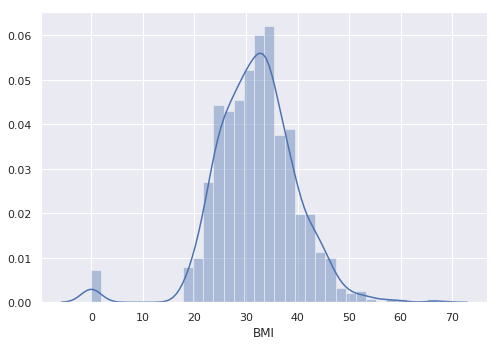

In [10]:
sns.distplot(pima_df['BMI']);

A nice addition - one can have multiple plots in a more convenient layout with `matplotlib`'s `.subplots()`. It produces a `Figure` object (assigned to `fig`) and a collection of `Axis` objects (assigned to `axs`). In the example below, it produces a 2x2 grid; to address a specific axis, we need two dimensions (e.g., `axs[1,0]` for second row and first column).

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


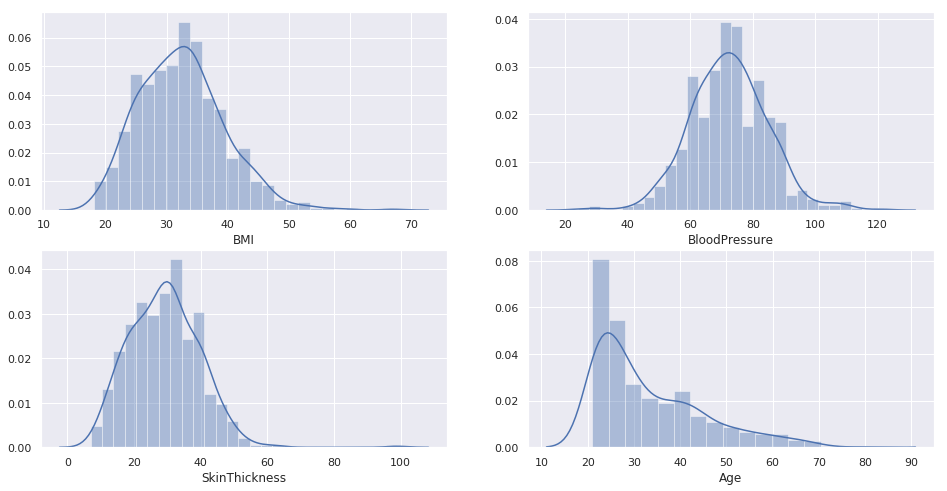

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(16,8))
sns.distplot(pima_df['BMI'].loc[ pima_df['BMI']>0 ], ax=axs[0,0])
sns.distplot(pima_df['BloodPressure'].loc[ pima_df['BloodPressure']>0 ], ax=axs[0,1])
sns.distplot(pima_df['SkinThickness'].loc[ pima_df['SkinThickness']>0 ], ax=axs[1,0])
sns.distplot(pima_df['Age'].loc[ pima_df['Age']>0 ], ax=axs[1,1]);

There is plenty of copy-and-pasting above...

Below, I have a more flexible fragment code that relies on a loop and an iterable. Not to worry if you don't fully understand it - but keep it as reference for future work and independent study. It is worth mentioning:

* `.reshape(-1)` will change the two dimensional array of axes into a unidimensional one, which is useful for iteration purposes.

* `iter(axs.reshape(-1))` gives me an object that allows for iterating over each axis, one by one.

* `for col in cols`: iterates over the list of columns labels defined by `cols`. At each iteration, `col` binds to one of the labels. In turn, `next(axs_it)` produces the next axis to be plotted on. In the first iteration, `col` is `BMI`, and `cur_ax` will point to the top-left axis.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


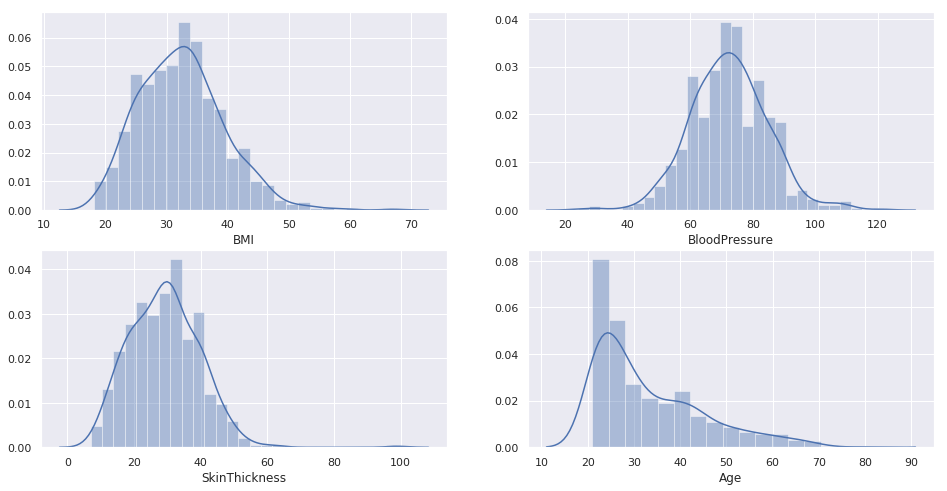

In [12]:
(fig, axs) = plt.subplots(2, 2, figsize=(16,8))
axs_it = iter(axs.reshape(-1))
cols = [ 'BMI', 'BloodPressure', 'SkinThickness', 'Age' ]
for col in cols:
    cur_ax = next(axs_it)
    sns.distplot(pima_df[col].loc[ pima_df[col]>0 ], ax=cur_ax);
    

## Relationships: Two Quantitative Features

The vastly popular way of analysing the relationship of two quantitative features is a **scatter plot**. `seaborn` offers the useful `.jointplot()` which, among other things, can display marginal data distributions too.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


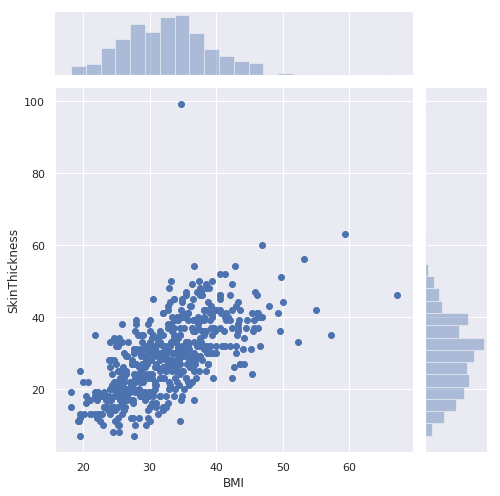

In [13]:
df = pima_df.query('BMI>0 and SkinThickness>0')
sns.jointplot(data=df, x='BMI', y='SkinThickness', height=7);

Just by looking at the scatter plot above, is there anything that we can say about a **relationship between `BMI` and `SkinThickness`**? As the values of BMI change (i.e., increase or decrease), do we see, broadly, an associate change in skin thickness?

We can ask `.jointplot()` to help us by displaying a regression line.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


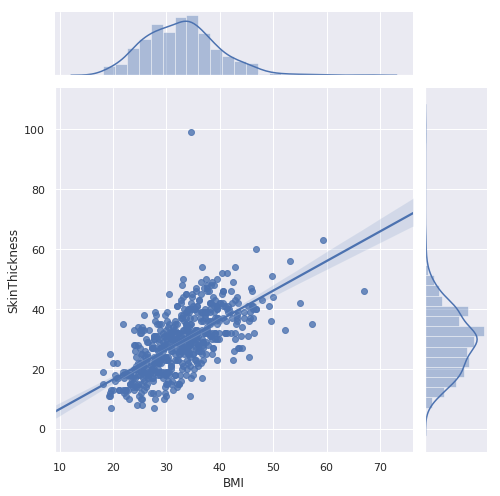

In [14]:
sns.jointplot(data=df, x='BMI', y='SkinThickness', kind="reg", height=7);

Too many data points will cause **saturation** - the `alpha` parameter is available for a number of types of plots.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


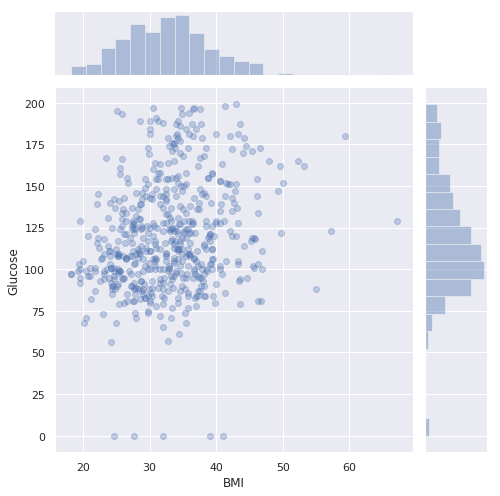

In [15]:
sns.jointplot(data=df, x='BMI', y='Glucose', alpha=0.3, height=7);

Also, one can divide the space into a grid of hexagons - the shade of colour matches the data density.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


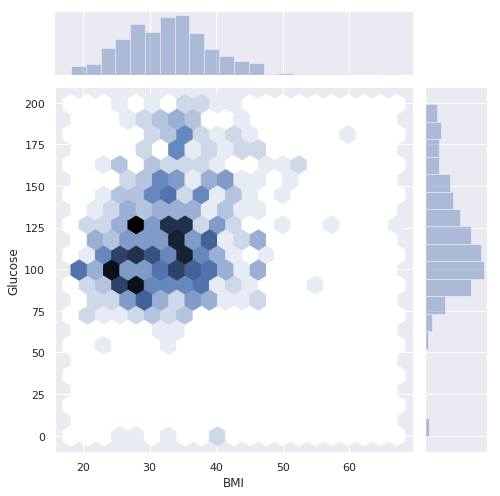

In [16]:
sns.jointplot(data=df, x='BMI', y='Glucose', kind="hex", height=7);

Anyone familiar with contour plots? You've seen it in maps with landscape features.

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


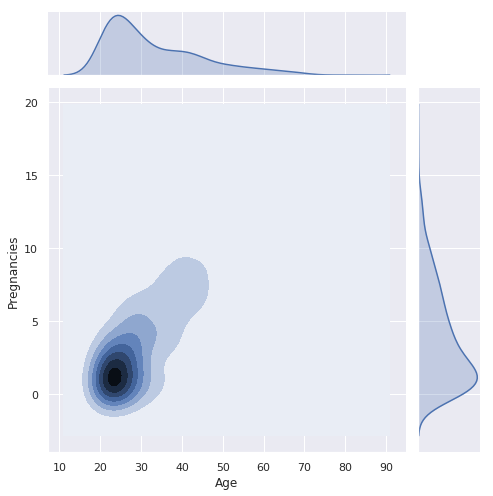

In [17]:
sns.jointplot(data=pima_df, x='Age', y='Pregnancies', kind="kde", height=7);

## Pairs of Features in a Plot Grid

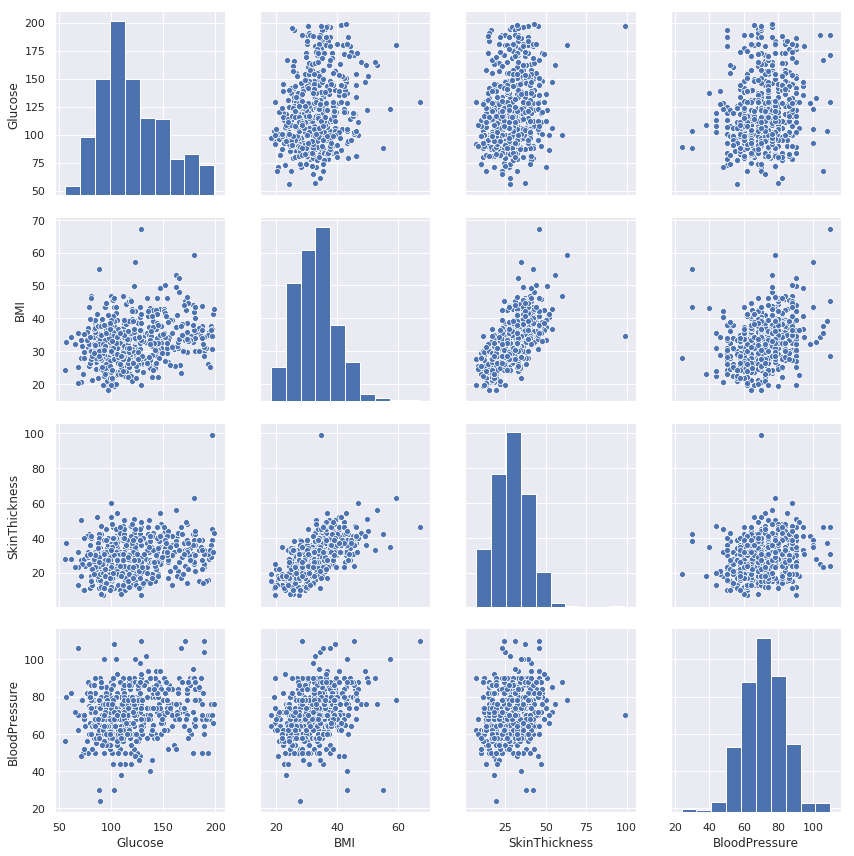

In [20]:
cols = [ 'Glucose', 'BMI', 'SkinThickness', 'BloodPressure' ]
mask = (pima_df['Glucose']>0) & (pima_df['BloodPressure']>0) & \
    (pima_df['SkinThickness']>0) & (pima_df['BMI']>0)
df = pima_df.loc[ mask, cols ]
sns.pairplot(df, height=3);

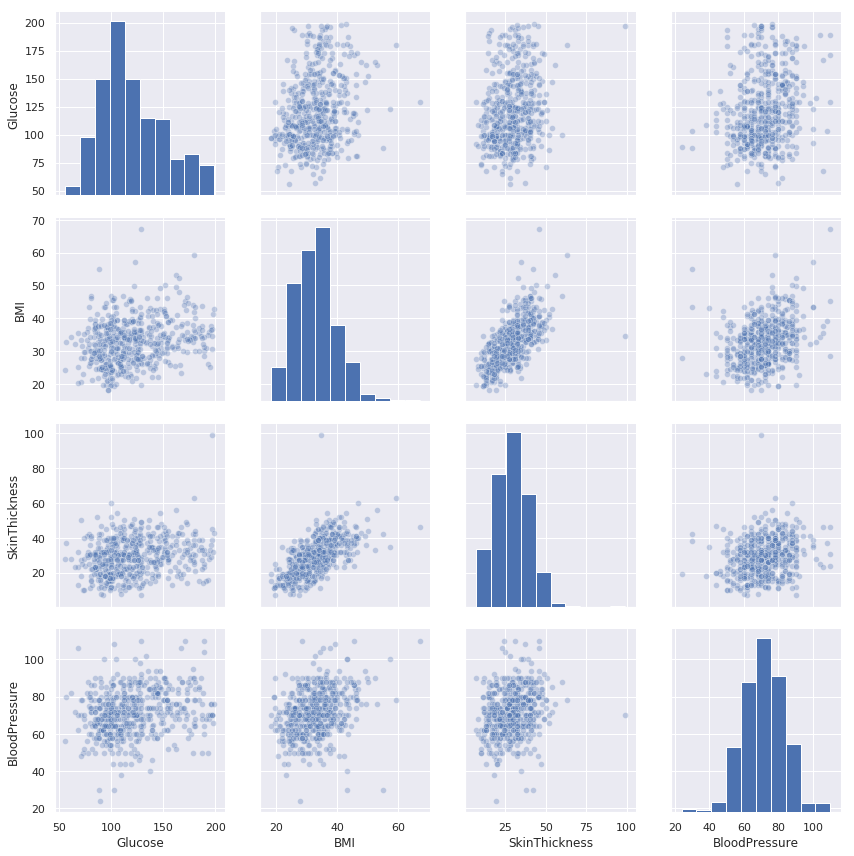

In [21]:
sns.pairplot(df, height=3, plot_kws=dict(alpha=0.3));

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


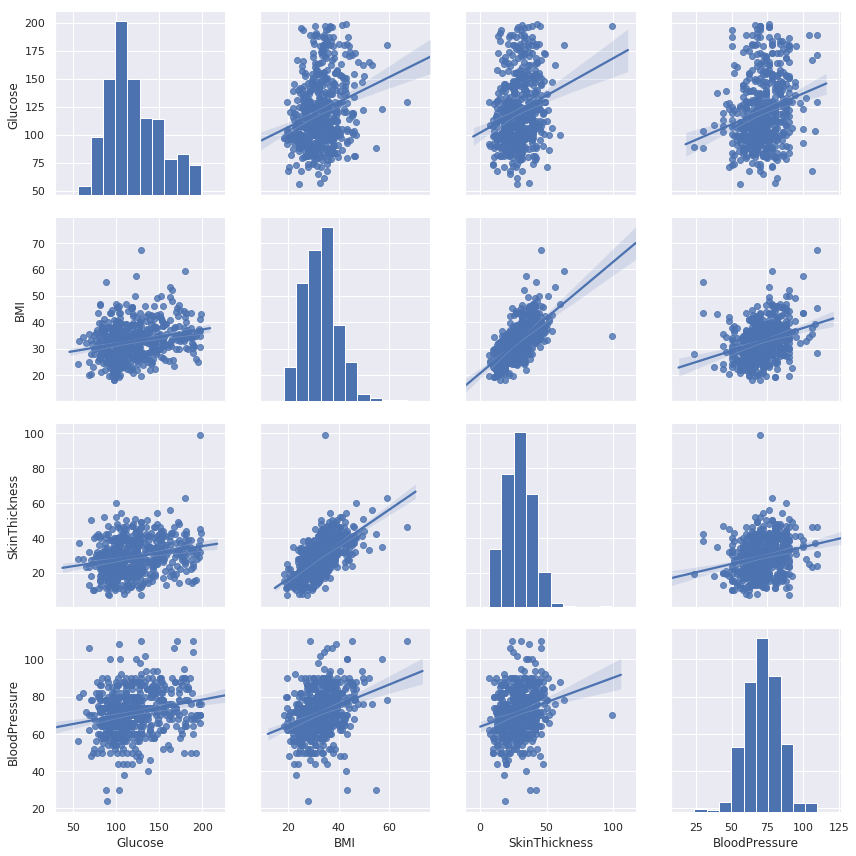

In [22]:
sns.pairplot(df, height=3, kind="reg");

Please don't worry too much about the following right now, as it will be revisited later, but we can quickly obtain some **objective metrics** that quantify the relationship of pairs of features. Here, the strength of association is between **-1** and **1**; the absolute value tells us about its strength and the sign, its direction. Roughly, ~0.7,0.8 is strong, ~0.4,0.5 is moderate, ~0.2 is weak.

In [23]:
df.corr()

,Glucose,BMI,SkinThickness,BloodPressure
Glucose,1.000000,0.247079,0.226590,0.219178
BMI,0.247079,1.000000,0.647422,0.307357
SkinThickness,0.226590,0.647422,1.000000,0.226072
BloodPressure,0.219178,0.307357,0.226072,1.000000


In [24]:
sns.set({ "figure.figsize": (12/1.2,8/1.2) })

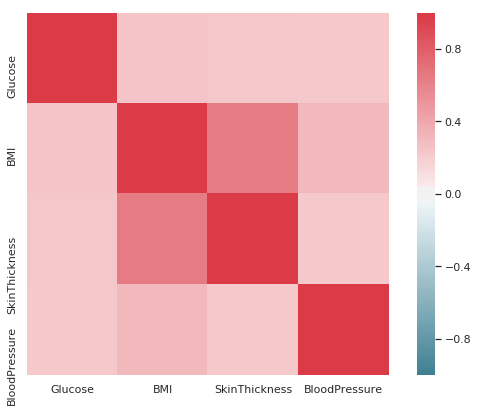

In [25]:
sns.heatmap(
    df.corr(), 
    square=True, 
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1
);

## Adding a Third, Categorical Feature

Use **colour** (`hue`) as a third dimension:

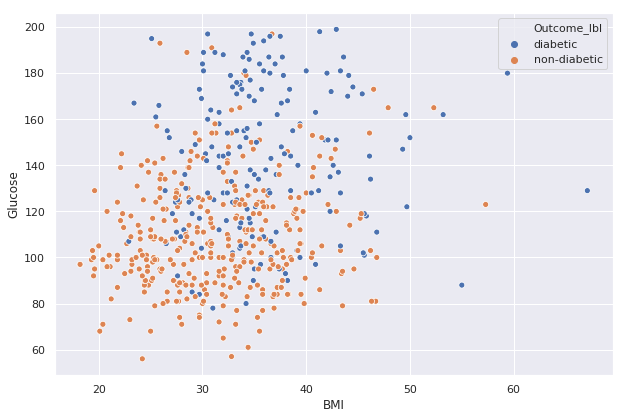

In [26]:
cols = [ 'Glucose', 'BMI', 'SkinThickness', 'BloodPressure', 'Outcome_lbl' ]
mask = (pima_df['Glucose']>0) & (pima_df['BloodPressure']>0) & \
    (pima_df['SkinThickness']>0) & (pima_df['BMI']>0)
df = pima_df.loc[ mask, cols ]
sns.scatterplot(data=df, x='BMI', y='Glucose', hue='Outcome_lbl');

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


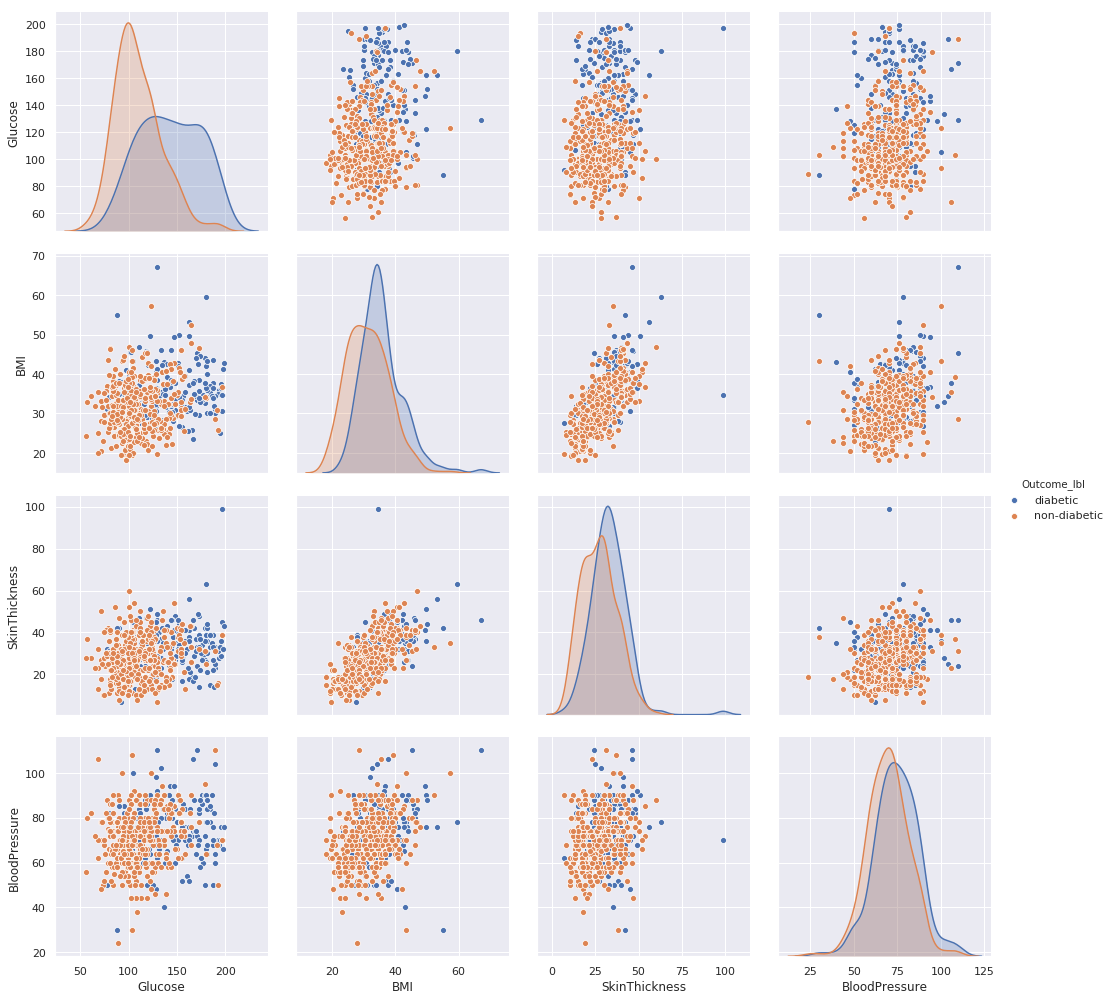

In [27]:
sns.pairplot(data=df, hue='Outcome_lbl', height=3.5);

What do the plots in the diagonal tell us?

KDE for different outcomes for each column

## One Categorical, One Quantitative Feature

In [28]:
sns.set({ "figure.figsize": (12/1.5,8/1.5) })

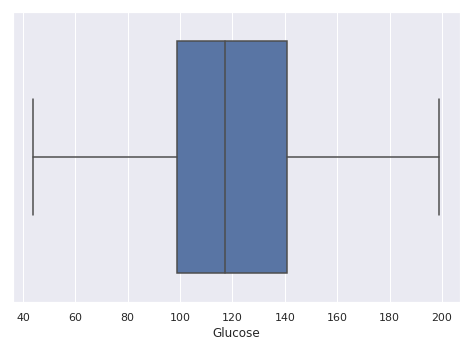

In [29]:
sns.boxplot(pima_df.loc[pima_df['Glucose']>0, 'Glucose']);

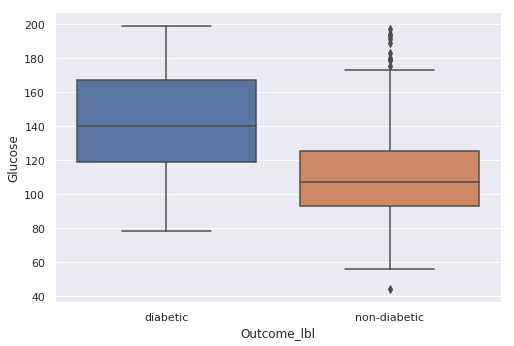

In [30]:
sns.boxplot(x='Outcome_lbl', y='Glucose', data=pima_df.loc[pima_df['Glucose']>0]);

In [31]:
sns.set({ "figure.figsize": (12/1.2,8/1.2) })

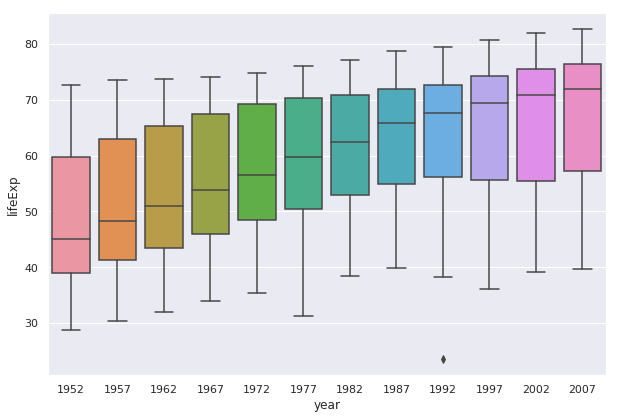

In [32]:
sns.boxplot(x='year', y='lifeExp', data=gm_df);

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


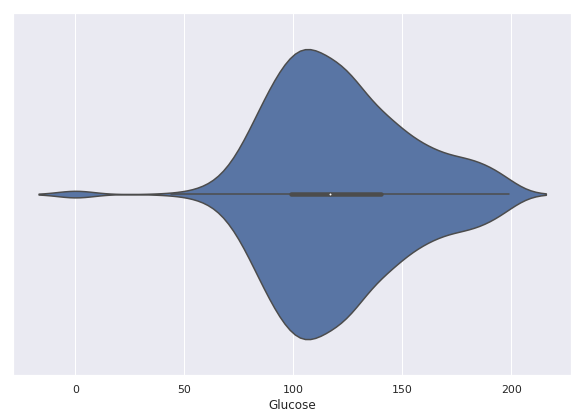

In [33]:
sns.violinplot(pima_df['Glucose'], height=8/1.5, aspect=8/5);

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


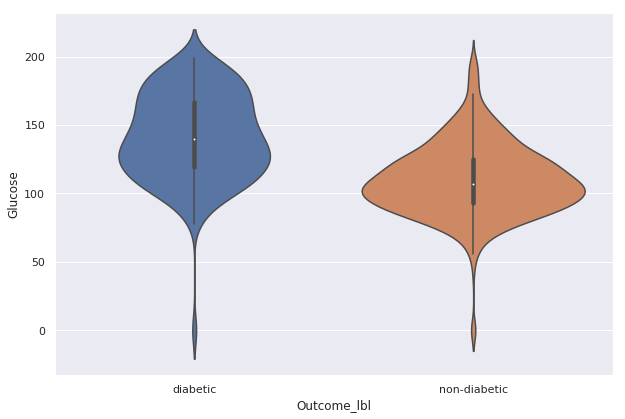

In [34]:
sns.violinplot(x='Outcome_lbl', y='Glucose', data=pima_df);

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


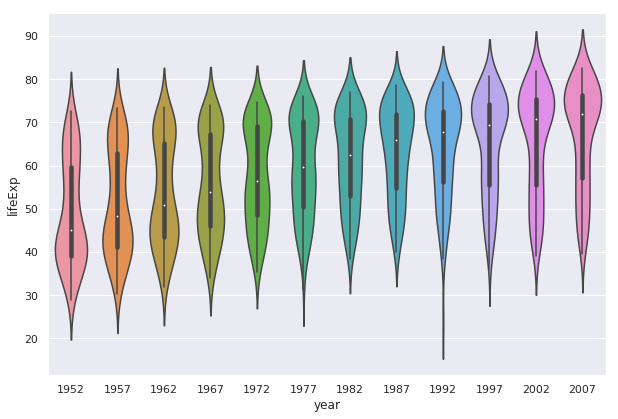

In [35]:
sns.violinplot(x='year', y='lifeExp', data=gm_df);

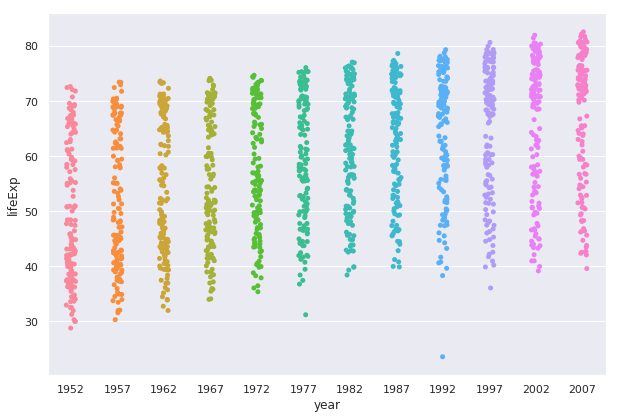

In [36]:
sns.stripplot(x='year', y='lifeExp', data=gm_df, jitter=True);

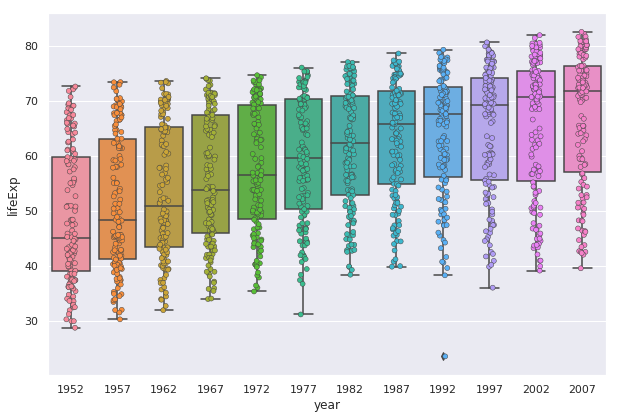

In [37]:
cur_ax = sns.boxplot(x='year', y='lifeExp', data=gm_df)
sns.stripplot(x='year', y='lifeExp', data=gm_df, jitter=True, linewidth=0.5, ax=cur_ax);

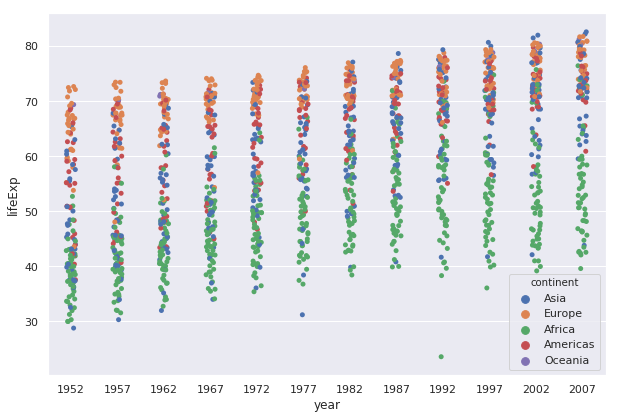

In [38]:
sns.stripplot(x='year', y='lifeExp', data=gm_df, hue='continent', jitter=True);

## Two Categorical Features

In [42]:
pima_df.groupby(by=['Outcome_lbl', 'BMI_cat']).size().unstack()

BMI_cat,low,normal,overweight,obese
Outcome_lbl,,,,
diabetic,2,7,40,219
non-diabetic,13,95,139,253


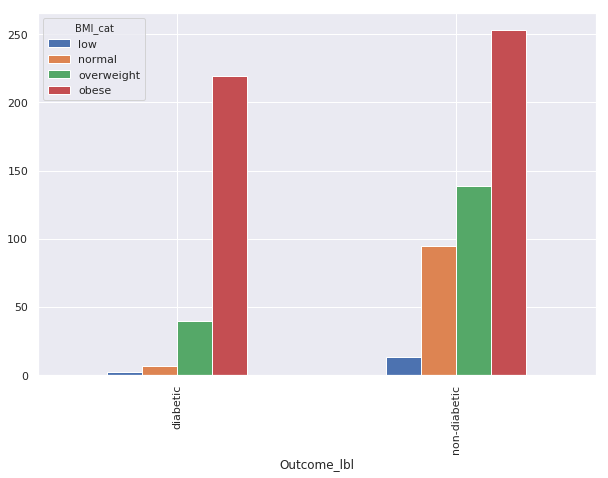

In [43]:
pima_df.groupby(by=['Outcome_lbl', 'BMI_cat']).size().unstack().plot.bar();

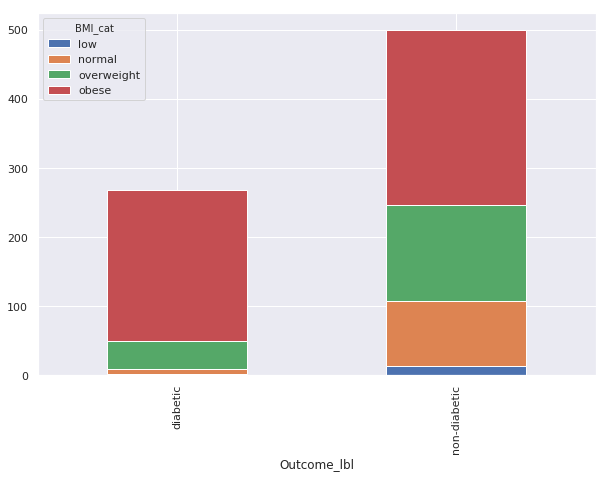

In [44]:
pima_df.groupby(by=['Outcome_lbl', 'BMI_cat']).size().unstack().plot.bar(stacked=True);

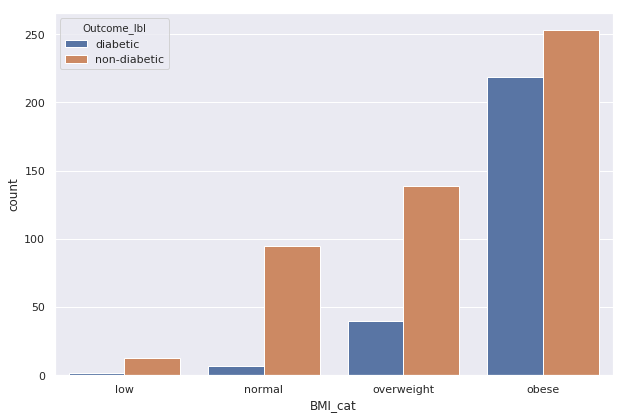

In [45]:
sns.countplot(data=pima_df, x='BMI_cat', hue='Outcome_lbl')

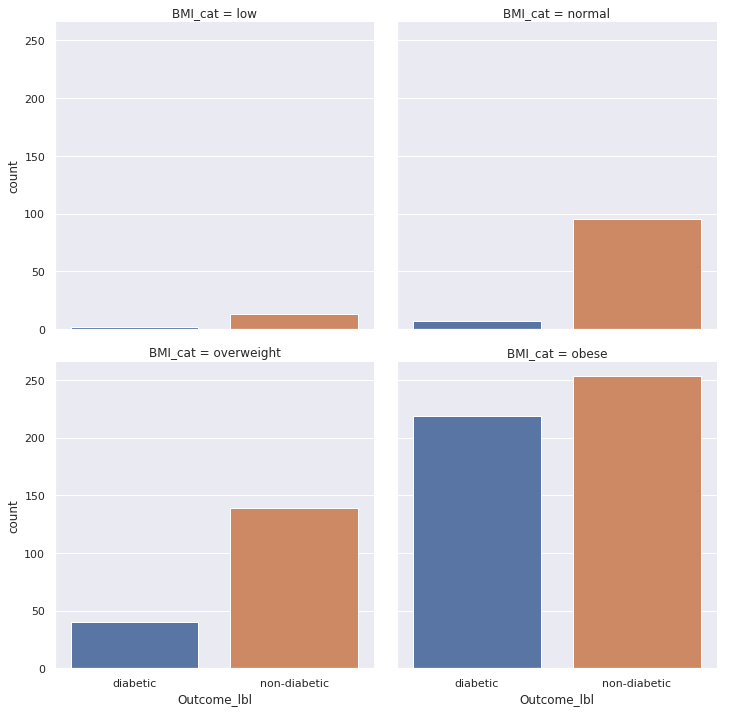

In [40]:
sns.catplot(data=pima_df, x='Outcome_lbl', col='BMI_cat', kind="count", col_wrap=2);

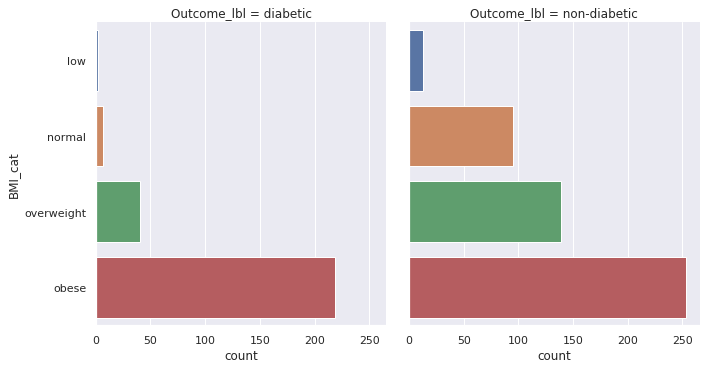

In [41]:

sns.catplot(
    data=pima_df, 
    col='Outcome_lbl', 
    y='BMI_cat', 
    kind="count", 
    col_wrap=2,
);

## Checkpoint

Perform a similar exploratory data analysis, using different combinations of quantitative and categorical features, on the `titanic` dataset. For a richer set of features, you might want to use `seaborn`'s build-in version of the data:

In [ ]:
titanic_df = sns.load_dataset('titanic')

In [ ]:
titanic_df.head()